## k-Means

### Source: 

https://www.kaggle.com/lava18/google-play-store-apps

### Collecting the Data

In [1]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
import time

In [2]:
dataset = pd.read_csv('googleps_cleaned.csv')

In [3]:
dataset.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,0,High Rating,159.0,19.0,9,0,0.0,1,9
1,0,Average Rating,967.0,14.0,12,0,0.0,1,11
2,0,High Rating,87510.0,8.7,14,0,0.0,1,9
3,0,High Rating,215644.0,25.0,16,0,0.0,4,9
4,0,High Rating,967.0,2.8,11,0,0.0,1,10


In [4]:
ds1_7 = dataset.iloc[:, [0,2,3,4, 5, 6, 7, 8]]
print (ds1_7.head())

   Category   Reviews  Size  Installs  Type  Price  Content Rating  Genres
0         0     159.0  19.0         9     0    0.0               1       9
1         0     967.0  14.0        12     0    0.0               1      11
2         0   87510.0   8.7        14     0    0.0               1       9
3         0  215644.0  25.0        16     0    0.0               4       9
4         0     967.0   2.8        11     0    0.0               1      10


### Feature Selection using Scatter Map and Correlation

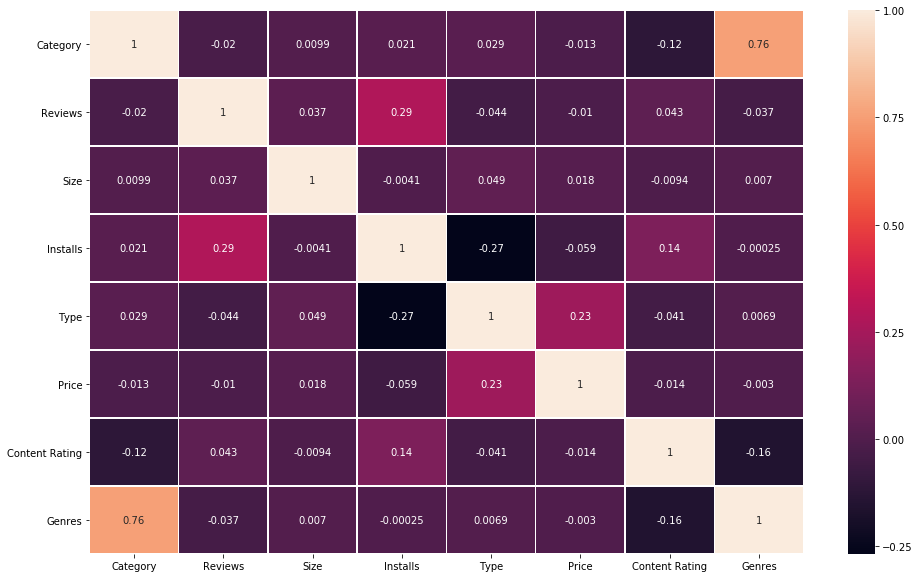

In [5]:
import seaborn as sns
plt.figure(figsize=(16, 10))
sns.heatmap(dataset.corr(), annot=True,linewidths=.5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000219484033C8>,
      dtype=object)

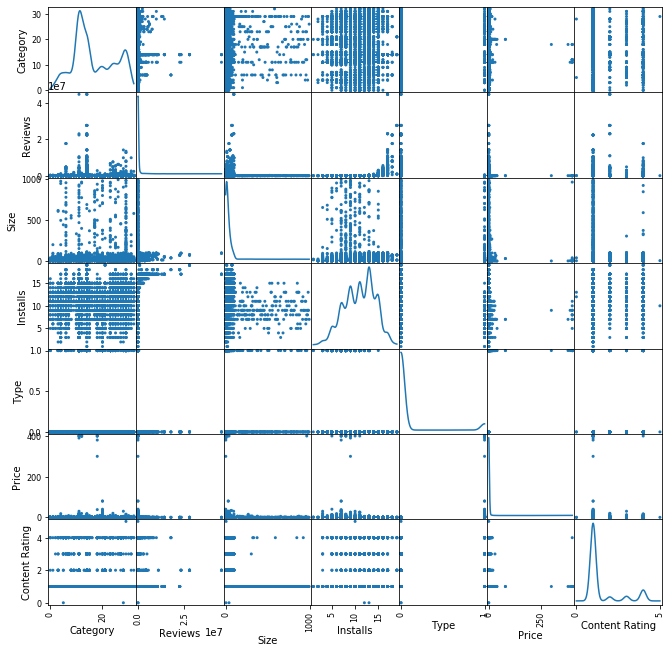

In [6]:
from pandas.plotting import scatter_matrix

scatter_matrix(dataset.iloc[:,0:8], alpha=1, figsize=(11, 11), diagonal='kde')

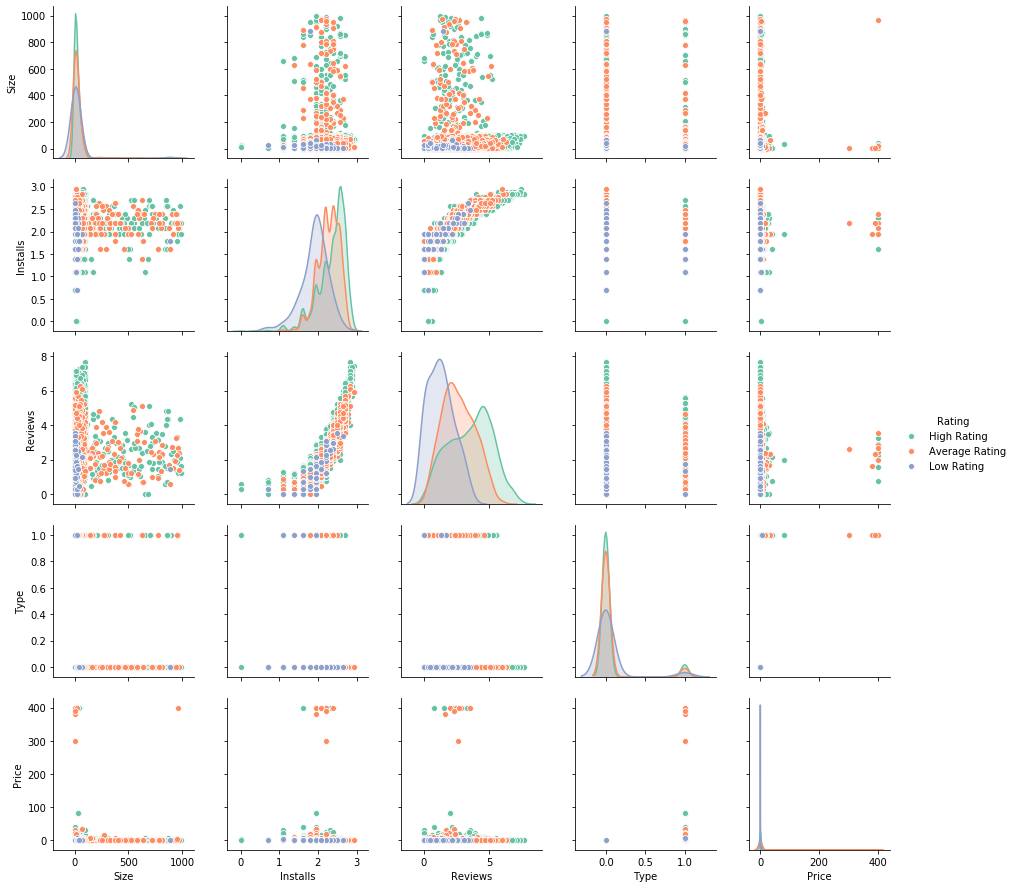

In [7]:
a = dataset['Rating'].dropna()
b = dataset['Size'].dropna()
z = dataset['Installs'][dataset.Installs!=0].dropna()
p = dataset['Reviews'][dataset.Reviews!=0].dropna()
t = dataset['Type']
price = dataset['Price']

p = sns.pairplot(pd.DataFrame(list(zip(a, b, np.log(z), np.log10(p), t,price)), 
                        columns=['Rating','Size', 'Installs', 'Reviews', 'Type', 'Price']), hue='Rating', palette="Set2")

According to the Pearson Correlation Matrix, we can see that 'Genres' and 'Category' have high positive correlation.

We are going to ignore some features that don't contribute much to the model.

Selected features are Reviews and Size, Reviews and Price.

### Elbow Method - Finding Optimum Number of Cluster

In [8]:
x = ds1_7.values
y = dataset['Rating']

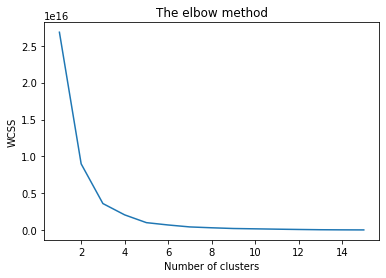

In [9]:
from sklearn.cluster import KMeans
wcss = []

# Trying kmeans for k=1 to k=15
for i in range(1, 16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
  
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 16), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

### KMeans with 3 clusters


Using the elbow method, we decided that the optimal number of cluster is 3. 

We try running KMeans with 3 clusters first:

In [10]:
start=time.time()
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
end=time.time()
print(end-start)

0.07878851890563965


In [11]:
ds1_7[y_kmeans==0].head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,0,159.0,19.0,9,0,0.0,1,9
1,0,967.0,14.0,12,0,0.0,1,11
2,0,87510.0,8.7,14,0,0.0,1,9
3,0,215644.0,25.0,16,0,0.0,4,9
4,0,967.0,2.8,11,0,0.0,1,10


In [ ]:
### Select 'Reviews' and 'Size' to figure out the clustering

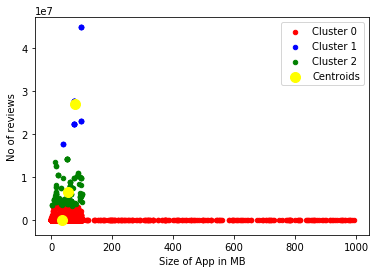

In [12]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 2], x[y_kmeans == 0, 1], s = 20, c = 'red', label = 'Cluster 0')
plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 1], s = 20, c = 'blue', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 2, 2], x[y_kmeans == 2, 1], s = 20, c = 'green', label = 'Cluster 2')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.xlabel("Size of App in MB")
plt.ylabel("No of reviews")
plt.legend()

The presence of the long tail seems to disturb our visualization. We will filter the data to get a clearer picture.

In [13]:
dataset.shape

(7723, 9)

In [14]:
df=dataset.loc[(dataset['Size'] < 100) & (dataset['Reviews'] <= 1000000)]

In [15]:
ds1 = df.iloc[:, [0,2,3,4, 5, 6, 7, 8]]

In [16]:
x = ds1.values
y = df['Rating']

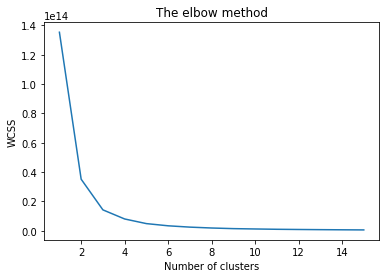

In [17]:
from sklearn.cluster import KMeans
wcss = []

# Trying kmeans for k=1 to k=15
for i in range(1, 16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
   
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 16), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [18]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [19]:
ds1[y_kmeans==0].head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres
254,6,659395.0,11.0,17,0,0.0,1,33
262,6,615381.0,37.0,15,0,0.0,3,33
303,6,483565.0,20.0,15,0,0.0,1,33
304,6,552441.0,29.0,15,0,0.0,1,33
607,9,702975.0,49.0,16,0,0.0,1,49


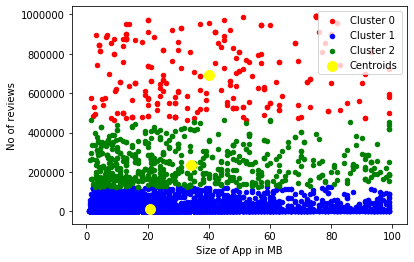

In [20]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 2], x[y_kmeans == 0, 1], s = 20, c = 'red', label = 'Cluster 0')
plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 1], s = 20, c = 'blue', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 2, 2], x[y_kmeans == 2, 1], s = 20, c = 'green', label = 'Cluster 2')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.xlabel("Size of App in MB")
plt.ylabel("No of reviews")
plt.legend()

We can interpret the segmentation as follows:
Cluster 1: Small apps with very limited reviews
Cluster 2: Medium sized apps with some reviews
Cluster 0: Large apps with many reviews

On the surface, it appears large android apps generally more popular with users, which explains why the larger apps get more reviews. For a company targeting to launch new apps, they should aim bigger apps (30-40MB), which means more features and longer development time/time to market. The small app (20MB and below) segment generally struggle to get user reviews.

However, it could also mean that large apps and small apps have different markets altogether. 
For example,large apps take up alot of space in the phone and also need a longer time to download, if the network speed is low. In emerging markets, where the internet speed is slow and device storage space is limited, the smaller apps may be more popular. Thus, the issue may be that smaller apps tend to be more popular in emerging markets, where cultures are not used to providing reviews. The company launching the app will have to study their target market carefully. 


### Model Evaluation

In [21]:
from sklearn import metrics
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, y_kmeans))
print("Completeness: %0.3f" % metrics.completeness_score(y, y_kmeans))
print("V-measure: %0.3f" % metrics.v_measure_score(y, y_kmeans))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y, y_kmeans))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(y, y_kmeans))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(x, y_kmeans))

Homogeneity: 0.029
Completeness: 0.040
V-measure: 0.034
Adjusted Rand Index: -0.085
Adjusted Mutual Information: 0.029


C:\Users\patch\Anaconda3\envs\hans\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Silhouette Coefficient: 0.852


The homogenity, completement, v-measure, and ARI scores are all very low, indicating that K-Means is not suitable here. This could be due to the odd shapes of the clusters.

Only silhouette coefficient is high here, indicating good/dense clustering.

### Select 'Reviews' and 'Price' to figure out the clustering

In [22]:
df=dataset.loc[(dataset['Price'] < 20) & (dataset['Reviews'] <= 200000)&(dataset['Type']==1)]
df.shape

(543, 9)

In [23]:
ds1 = df.iloc[:, [0,2,3,4, 5, 6, 7, 8]]
print (ds1.head())

     Category  Reviews  Size  Installs  Type  Price  Content Rating  Genres
174         4  11442.0   6.8        11     1   4.99               1      19
175         4  10295.0  39.0        11     1   4.99               1      19
214         4  11442.0   6.8        11     1   4.99               1      19
215         4  10295.0  39.0        11     1   4.99               1      19
320         7     57.0   6.2         7     1   6.99               1      35


In [24]:
x = ds1.values
y=df['Rating']

In [25]:
start=time.time()
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
end=time.time()
print(end-start)

0.030916929244995117


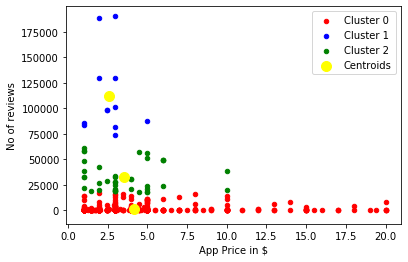

In [26]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 5], x[y_kmeans == 0, 1], s = 20, c = 'red', label = 'Cluster 0')
plt.scatter(x[y_kmeans == 1, 5], x[y_kmeans == 1, 1], s = 20, c = 'blue', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 2, 5], x[y_kmeans == 2, 1], s = 20, c = 'green', label = 'Cluster 2')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 5], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.xlabel("App Price in $")
plt.ylabel("No of reviews")
plt.legend()

In this price analysis section, we assume that the company is only interested the segmentation of paid apps, so free apps were filtered out. 

In the analysis above, cluster 0 enjoys the highest number of customer reviews. The centroid of this cluster appears to be closer to $2.50.

On the other hand, clusters 1 and 2 seems to receive significantly fewer user reviews. 

This indicates that app pricing is important for app popularity. Users would expect more functionality for a higher priced app, so if a company is going to set the app price above $3-5, the design of the app will have to be extraordinary, with stunning features and functionality.

### PCA

In [27]:
df = pd.read_csv('googleps_cleaned.csv')

In [28]:
from sklearn.preprocessing import StandardScaler
features = ['Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres']

x = df.loc[:, features].values
y = df.loc[:,['Rating']].values
x = StandardScaler().fit_transform(x)

pd.DataFrame(data=x, columns = features).head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,-2.03631,-0.158138,-0.195722,-0.622513,-0.284156,-0.064812,-0.469001,-1.590283
1,-2.03631,-0.157704,-0.249177,0.311196,-0.284156,-0.064812,-0.469001,-1.528596
2,-2.03631,-0.111271,-0.305840,0.933669,-0.284156,-0.064812,-0.469001,-1.590283
3,-2.03631,-0.042523,-0.131576,1.556141,-0.284156,-0.064812,2.499928,-1.590283
4,-2.03631,-0.157704,-0.368917,-0.000040,-0.284156,-0.064812,-0.469001,-1.559440


In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,2.289136,-0.859828
1,2.329817,-0.278366
2,2.431526,0.115043
3,3.235964,1.048576
4,2.325821,-0.468200


In [30]:
finalDf = pd.concat([principalDf, df[['Rating']]], axis = 1)

In [31]:
x = principalDf.values
y=finalDf['Rating'].values

In [32]:
start=time.time()
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
end=time.time()
print(end-start)

0.1416158676147461


In [33]:
from sklearn import metrics
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, y_kmeans))
print("Completeness: %0.3f" % metrics.completeness_score(y, y_kmeans))
print("V-measure: %0.3f" % metrics.v_measure_score(y, y_kmeans))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y, y_kmeans))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(y, y_kmeans))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(x, y_kmeans))

Homogeneity: 0.002
Completeness: 0.001
V-measure: 0.001
Adjusted Rand Index: -0.005
Adjusted Mutual Information: 0.001


C:\Users\patch\Anaconda3\envs\hans\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Silhouette Coefficient: 0.446


### Conclusion

Using PCA also did not improve the model evaluation scores.